In [1]:
import csv

import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

# Specify each path

In [2]:
# Specify data paths
dataset = '/home/seadrone/project_seadrone/catkin_ws/src/hand-gesture-recognition-using-mediapipe/hand_gesture/src/model/keypoint_classifier/keypoint.csv'
model_save_path = '/home/seadrone/project_seadrone/catkin_ws/src/hand-gesture-recognition-using-mediapipe/hand_gesture/src/model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = '/home/seadrone/project_seadrone/catkin_ws/src/hand-gesture-recognition-using-mediapipe/hand_gesture/src/model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
# Change training classes if necessary
NUM_CLASSES = 10

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32), array([105,  93,  90, 272, 237, 357, 230, 556, 121, 295]))


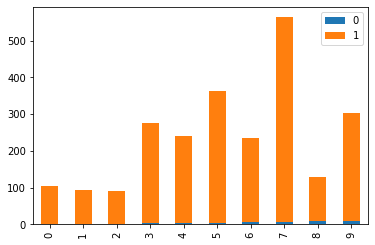

In [7]:
# Classes count
counts = np.unique(y_dataset, return_counts=True)
df = pd.DataFrame(counts)
df.T.plot(kind="bar", stacked=True)
print(counts)

# Model building

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.0),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.0),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.0),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [9]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout (Dropout)            (None, 42)                0         
_________________________________________________________________
dense (Dense)                (None, 32)                1376      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1

In [10]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False, save_best_only=True)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=50, verbose=1)

In [11]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [12]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=64,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Train on 1767 samples, validate on 589 samples
Epoch 1/1000
  64/1767 [>.............................] - ETA: 1s - loss: 2.3571 - acc: 0.0156
Epoch 00001: val_loss improved from inf to 2.22327, saving model to /home/seadrone/project_seadrone/catkin_ws/src/hand-gesture-recognition-using-mediapipe/hand_gesture/src/model/keypoint_classifier/keypoint_classifier.hdf5
1767/1767 [==============================] - 0s 85us/sample - loss: 2.2843 - acc: 0.1404 - val_loss: 2.2233 - val_acc: 0.1562
Epoch 2/1000
  64/1767 [>.............................] - ETA: 0s - loss: 2.2775 - acc: 0.1094
Epoch 00002: val_loss improved from 2.22327 to 2.11966, saving model to /home/seadrone/project_seadrone/catkin_ws/src/hand-gesture-recognition-using-mediapipe/hand_gesture/src/model/keypoint_classifier/keypoint_classifier.hdf5
1767/1767 [==============================] - 0s 20us/sample - loss: 2.1805 - acc: 0.2235 - val_loss: 2.1197 - val_acc: 0.3294
Epoch 3/1000
  64/1767 [>.............................] - ETA

  64/1767 [>.............................] - ETA: 0s - loss: 0.2002 - acc: 1.0000
Epoch 00019: val_loss improved from 0.16413 to 0.13268, saving model to /home/seadrone/project_seadrone/catkin_ws/src/hand-gesture-recognition-using-mediapipe/hand_gesture/src/model/keypoint_classifier/keypoint_classifier.hdf5
1767/1767 [==============================] - 0s 19us/sample - loss: 0.1439 - acc: 0.9955 - val_loss: 0.1327 - val_acc: 0.9983
Epoch 20/1000
  64/1767 [>.............................] - ETA: 0s - loss: 0.0873 - acc: 1.0000
Epoch 00020: val_loss improved from 0.13268 to 0.10906, saving model to /home/seadrone/project_seadrone/catkin_ws/src/hand-gesture-recognition-using-mediapipe/hand_gesture/src/model/keypoint_classifier/keypoint_classifier.hdf5
1767/1767 [==============================] - 0s 19us/sample - loss: 0.1170 - acc: 0.9977 - val_loss: 0.1091 - val_acc: 0.9983
Epoch 21/1000
  64/1767 [>.............................] - ETA: 0s - loss: 0.0933 - acc: 1.0000
Epoch 00021: val_los

1767/1767 [==============================] - 0s 19us/sample - loss: 0.0172 - acc: 0.9994 - val_loss: 0.0149 - val_acc: 1.0000
Epoch 38/1000
  64/1767 [>.............................] - ETA: 0s - loss: 0.0152 - acc: 1.0000
Epoch 00038: val_loss improved from 0.01486 to 0.01468, saving model to /home/seadrone/project_seadrone/catkin_ws/src/hand-gesture-recognition-using-mediapipe/hand_gesture/src/model/keypoint_classifier/keypoint_classifier.hdf5
1767/1767 [==============================] - 0s 18us/sample - loss: 0.0153 - acc: 0.9994 - val_loss: 0.0147 - val_acc: 1.0000
Epoch 39/1000
  64/1767 [>.............................] - ETA: 0s - loss: 0.0074 - acc: 1.0000
Epoch 00039: val_loss did not improve from 0.01468
1767/1767 [==============================] - 0s 12us/sample - loss: 0.0139 - acc: 0.9994 - val_loss: 0.0171 - val_acc: 1.0000
Epoch 40/1000
  64/1767 [>.............................] - ETA: 0s - loss: 0.0110 - acc: 1.0000
Epoch 00040: val_loss improved from 0.01468 to 0.01152, 

  64/1767 [>.............................] - ETA: 0s - loss: 0.0043 - acc: 1.0000
Epoch 00059: val_loss did not improve from 0.00469
1767/1767 [==============================] - 0s 12us/sample - loss: 0.0050 - acc: 0.9994 - val_loss: 0.0049 - val_acc: 1.0000
Epoch 60/1000
  64/1767 [>.............................] - ETA: 0s - loss: 0.0039 - acc: 1.0000
Epoch 00060: val_loss improved from 0.00469 to 0.00425, saving model to /home/seadrone/project_seadrone/catkin_ws/src/hand-gesture-recognition-using-mediapipe/hand_gesture/src/model/keypoint_classifier/keypoint_classifier.hdf5
1767/1767 [==============================] - 0s 18us/sample - loss: 0.0053 - acc: 0.9994 - val_loss: 0.0042 - val_acc: 1.0000
Epoch 61/1000
  64/1767 [>.............................] - ETA: 0s - loss: 0.0034 - acc: 1.0000
Epoch 00061: val_loss did not improve from 0.00425
1767/1767 [==============================] - 0s 12us/sample - loss: 0.0046 - acc: 0.9994 - val_loss: 0.0045 - val_acc: 1.0000
Epoch 62/1000
  64/

  64/1767 [>.............................] - ETA: 0s - loss: 0.0020 - acc: 1.0000
Epoch 00085: val_loss improved from 0.00177 to 0.00171, saving model to /home/seadrone/project_seadrone/catkin_ws/src/hand-gesture-recognition-using-mediapipe/hand_gesture/src/model/keypoint_classifier/keypoint_classifier.hdf5
1767/1767 [==============================] - 0s 18us/sample - loss: 0.0022 - acc: 1.0000 - val_loss: 0.0017 - val_acc: 1.0000
Epoch 86/1000
  64/1767 [>.............................] - ETA: 0s - loss: 0.0013 - acc: 1.0000
Epoch 00086: val_loss did not improve from 0.00171
1767/1767 [==============================] - 0s 12us/sample - loss: 0.0022 - acc: 0.9994 - val_loss: 0.0029 - val_acc: 1.0000
Epoch 87/1000
  64/1767 [>.............................] - ETA: 0s - loss: 0.0014 - acc: 1.0000
Epoch 00087: val_loss improved from 0.00171 to 0.00156, saving model to /home/seadrone/project_seadrone/catkin_ws/src/hand-gesture-recognition-using-mediapipe/hand_gesture/src/model/keypoint_class

Epoch 109/1000
  64/1767 [>.............................] - ETA: 0s - loss: 0.0011 - acc: 1.0000
Epoch 00109: val_loss did not improve from 0.00095
1767/1767 [==============================] - 0s 11us/sample - loss: 0.0015 - acc: 1.0000 - val_loss: 0.0016 - val_acc: 1.0000
Epoch 110/1000
  64/1767 [>.............................] - ETA: 0s - loss: 0.0019 - acc: 1.0000
Epoch 00110: val_loss improved from 0.00095 to 0.00085, saving model to /home/seadrone/project_seadrone/catkin_ws/src/hand-gesture-recognition-using-mediapipe/hand_gesture/src/model/keypoint_classifier/keypoint_classifier.hdf5
1767/1767 [==============================] - 0s 20us/sample - loss: 8.7174e-04 - acc: 1.0000 - val_loss: 8.4971e-04 - val_acc: 1.0000
Epoch 111/1000
  64/1767 [>.............................] - ETA: 0s - loss: 7.2980e-04 - acc: 1.0000
Epoch 00111: val_loss did not improve from 0.00085
1767/1767 [==============================] - 0s 11us/sample - loss: 9.6881e-04 - acc: 1.0000 - val_loss: 0.0020 - va

  64/1767 [>.............................] - ETA: 0s - loss: 7.0512e-04 - acc: 1.0000
Epoch 00134: val_loss did not improve from 0.00058
1767/1767 [==============================] - 0s 11us/sample - loss: 5.7180e-04 - acc: 1.0000 - val_loss: 0.0010 - val_acc: 1.0000
Epoch 135/1000
  64/1767 [>.............................] - ETA: 0s - loss: 0.0023 - acc: 1.0000
Epoch 00135: val_loss improved from 0.00058 to 0.00056, saving model to /home/seadrone/project_seadrone/catkin_ws/src/hand-gesture-recognition-using-mediapipe/hand_gesture/src/model/keypoint_classifier/keypoint_classifier.hdf5
1767/1767 [==============================] - 0s 17us/sample - loss: 5.4719e-04 - acc: 1.0000 - val_loss: 5.5812e-04 - val_acc: 1.0000
Epoch 136/1000
  64/1767 [>.............................] - ETA: 0s - loss: 3.1483e-04 - acc: 1.0000
Epoch 00136: val_loss did not improve from 0.00056
1767/1767 [==============================] - 0s 12us/sample - loss: 7.0149e-04 - acc: 1.0000 - val_loss: 0.0031 - val_acc: 

  64/1767 [>.............................] - ETA: 0s - loss: 4.5014e-04 - acc: 1.0000
Epoch 00161: val_loss did not improve from 0.00042
1767/1767 [==============================] - 0s 11us/sample - loss: 2.9291e-04 - acc: 1.0000 - val_loss: 5.7197e-04 - val_acc: 1.0000
Epoch 162/1000
  64/1767 [>.............................] - ETA: 0s - loss: 1.9133e-04 - acc: 1.0000
Epoch 00162: val_loss did not improve from 0.00042
1767/1767 [==============================] - 0s 11us/sample - loss: 2.8899e-04 - acc: 1.0000 - val_loss: 5.1603e-04 - val_acc: 1.0000
Epoch 163/1000
  64/1767 [>.............................] - ETA: 0s - loss: 1.9621e-04 - acc: 1.0000
Epoch 00163: val_loss did not improve from 0.00042
1767/1767 [==============================] - 0s 11us/sample - loss: 2.8446e-04 - acc: 1.0000 - val_loss: 5.0815e-04 - val_acc: 1.0000
Epoch 164/1000
  64/1767 [>.............................] - ETA: 0s - loss: 1.9933e-04 - acc: 1.0000
Epoch 00164: val_loss did not improve from 0.00042
1767/

Epoch 187/1000
  64/1767 [>.............................] - ETA: 0s - loss: 1.1610e-04 - acc: 1.0000
Epoch 00187: val_loss did not improve from 0.00026
1767/1767 [==============================] - 0s 12us/sample - loss: 1.8911e-04 - acc: 1.0000 - val_loss: 3.6688e-04 - val_acc: 1.0000
Epoch 188/1000
  64/1767 [>.............................] - ETA: 0s - loss: 1.2242e-04 - acc: 1.0000
Epoch 00188: val_loss did not improve from 0.00026
1767/1767 [==============================] - 0s 11us/sample - loss: 1.8808e-04 - acc: 1.0000 - val_loss: 5.6537e-04 - val_acc: 1.0000
Epoch 189/1000
  64/1767 [>.............................] - ETA: 0s - loss: 9.5155e-05 - acc: 1.0000
Epoch 00189: val_loss did not improve from 0.00026
1767/1767 [==============================] - 0s 11us/sample - loss: 1.8907e-04 - acc: 1.0000 - val_loss: 2.6269e-04 - val_acc: 1.0000
Epoch 190/1000
  64/1767 [>.............................] - ETA: 0s - loss: 5.7608e-04 - acc: 1.0000
Epoch 00190: val_loss did not improve fro

Epoch 215/1000
  64/1767 [>.............................] - ETA: 0s - loss: 3.1316e-04 - acc: 1.0000
Epoch 00215: val_loss improved from 0.00019 to 0.00019, saving model to /home/seadrone/project_seadrone/catkin_ws/src/hand-gesture-recognition-using-mediapipe/hand_gesture/src/model/keypoint_classifier/keypoint_classifier.hdf5
1767/1767 [==============================] - 0s 18us/sample - loss: 1.2210e-04 - acc: 1.0000 - val_loss: 1.8863e-04 - val_acc: 1.0000
Epoch 216/1000
  64/1767 [>.............................] - ETA: 0s - loss: 3.6958e-04 - acc: 1.0000
Epoch 00216: val_loss did not improve from 0.00019
1767/1767 [==============================] - 0s 12us/sample - loss: 1.3630e-04 - acc: 1.0000 - val_loss: 2.0521e-04 - val_acc: 1.0000
Epoch 217/1000
  64/1767 [>.............................] - ETA: 0s - loss: 3.8673e-05 - acc: 1.0000
Epoch 00217: val_loss did not improve from 0.00019
1767/1767 [==============================] - 0s 11us/sample - loss: 1.5381e-04 - acc: 1.0000 - val_l

Epoch 242/1000
  64/1767 [>.............................] - ETA: 0s - loss: 5.4875e-05 - acc: 1.0000
Epoch 00242: val_loss did not improve from 0.00013
1767/1767 [==============================] - 0s 11us/sample - loss: 8.4315e-05 - acc: 1.0000 - val_loss: 1.7411e-04 - val_acc: 1.0000
Epoch 243/1000
  64/1767 [>.............................] - ETA: 0s - loss: 2.5832e-05 - acc: 1.0000
Epoch 00243: val_loss did not improve from 0.00013
1767/1767 [==============================] - 0s 11us/sample - loss: 8.1112e-05 - acc: 1.0000 - val_loss: 1.8390e-04 - val_acc: 1.0000
Epoch 244/1000
  64/1767 [>.............................] - ETA: 0s - loss: 3.5054e-05 - acc: 1.0000
Epoch 00244: val_loss did not improve from 0.00013
1767/1767 [==============================] - 0s 11us/sample - loss: 7.3678e-05 - acc: 1.0000 - val_loss: 1.7356e-04 - val_acc: 1.0000
Epoch 245/1000
  64/1767 [>.............................] - ETA: 0s - loss: 2.7292e-04 - acc: 1.0000
Epoch 00245: val_loss did not improve fro

1767/1767 [==============================] - 0s 18us/sample - loss: 5.1011e-05 - acc: 1.0000 - val_loss: 9.0550e-05 - val_acc: 1.0000
Epoch 270/1000
  64/1767 [>.............................] - ETA: 0s - loss: 7.2780e-05 - acc: 1.0000
Epoch 00270: val_loss did not improve from 0.00009
1767/1767 [==============================] - 0s 12us/sample - loss: 6.9723e-05 - acc: 1.0000 - val_loss: 4.0414e-04 - val_acc: 1.0000
Epoch 271/1000
  64/1767 [>.............................] - ETA: 0s - loss: 3.1278e-04 - acc: 1.0000
Epoch 00271: val_loss did not improve from 0.00009
1767/1767 [==============================] - 0s 12us/sample - loss: 6.6576e-05 - acc: 1.0000 - val_loss: 1.5739e-04 - val_acc: 1.0000
Epoch 272/1000
  64/1767 [>.............................] - ETA: 0s - loss: 3.8146e-05 - acc: 1.0000
Epoch 00272: val_loss did not improve from 0.00009
1767/1767 [==============================] - 0s 11us/sample - loss: 7.6628e-05 - acc: 1.0000 - val_loss: 4.5152e-04 - val_acc: 1.0000
Epoch 27

Epoch 298/1000
  64/1767 [>.............................] - ETA: 0s - loss: 8.9070e-06 - acc: 1.0000
Epoch 00298: val_loss did not improve from 0.00008
1767/1767 [==============================] - 0s 12us/sample - loss: 3.7494e-05 - acc: 1.0000 - val_loss: 4.0953e-04 - val_acc: 1.0000
Epoch 299/1000
  64/1767 [>.............................] - ETA: 0s - loss: 2.4099e-05 - acc: 1.0000
Epoch 00299: val_loss did not improve from 0.00008
1767/1767 [==============================] - 0s 11us/sample - loss: 5.4932e-05 - acc: 1.0000 - val_loss: 4.5695e-04 - val_acc: 1.0000
Epoch 300/1000
  64/1767 [>.............................] - ETA: 0s - loss: 8.9256e-06 - acc: 1.0000
Epoch 00300: val_loss did not improve from 0.00008
1767/1767 [==============================] - 0s 11us/sample - loss: 3.3947e-05 - acc: 1.0000 - val_loss: 9.9829e-05 - val_acc: 1.0000
Epoch 301/1000
  64/1767 [>.............................] - ETA: 0s - loss: 1.4947e-05 - acc: 1.0000
Epoch 00301: val_loss did not improve fro

  64/1767 [>.............................] - ETA: 0s - loss: 2.3100e-05 - acc: 1.0000
Epoch 00326: val_loss did not improve from 0.00007
1767/1767 [==============================] - 0s 11us/sample - loss: 1.9375e-05 - acc: 1.0000 - val_loss: 9.2903e-05 - val_acc: 1.0000
Epoch 327/1000
  64/1767 [>.............................] - ETA: 0s - loss: 9.8843e-06 - acc: 1.0000
Epoch 00327: val_loss did not improve from 0.00007
1767/1767 [==============================] - 0s 11us/sample - loss: 2.0141e-05 - acc: 1.0000 - val_loss: 7.6886e-05 - val_acc: 1.0000
Epoch 328/1000
  64/1767 [>.............................] - ETA: 0s - loss: 3.7621e-05 - acc: 1.0000
Epoch 00328: val_loss did not improve from 0.00007
1767/1767 [==============================] - 0s 11us/sample - loss: 1.8756e-05 - acc: 1.0000 - val_loss: 1.8545e-04 - val_acc: 1.0000
Epoch 329/1000
  64/1767 [>.............................] - ETA: 0s - loss: 1.5922e-05 - acc: 1.0000
Epoch 00329: val_loss did not improve from 0.00007
1767/

Epoch 354/1000
  64/1767 [>.............................] - ETA: 0s - loss: 6.4353e-06 - acc: 1.0000
Epoch 00354: val_loss did not improve from 0.00004
1767/1767 [==============================] - 0s 12us/sample - loss: 1.2173e-05 - acc: 1.0000 - val_loss: 8.0087e-05 - val_acc: 1.0000
Epoch 355/1000
  64/1767 [>.............................] - ETA: 0s - loss: 1.1309e-05 - acc: 1.0000
Epoch 00355: val_loss did not improve from 0.00004
1767/1767 [==============================] - 0s 11us/sample - loss: 1.3686e-05 - acc: 1.0000 - val_loss: 3.4734e-04 - val_acc: 1.0000
Epoch 356/1000
  64/1767 [>.............................] - ETA: 0s - loss: 1.5662e-05 - acc: 1.0000
Epoch 00356: val_loss did not improve from 0.00004
1767/1767 [==============================] - 0s 11us/sample - loss: 1.3231e-05 - acc: 1.0000 - val_loss: 5.2451e-05 - val_acc: 1.0000
Epoch 357/1000
  64/1767 [>.............................] - ETA: 0s - loss: 2.7500e-05 - acc: 1.0000
Epoch 00357: val_loss did not improve fro

Epoch 383/1000
  64/1767 [>.............................] - ETA: 0s - loss: 1.7630e-05 - acc: 1.0000
Epoch 00383: val_loss did not improve from 0.00004
1767/1767 [==============================] - 0s 11us/sample - loss: 2.3599e-05 - acc: 1.0000 - val_loss: 1.4710e-04 - val_acc: 1.0000
Epoch 384/1000
  64/1767 [>.............................] - ETA: 0s - loss: 1.2555e-05 - acc: 1.0000
Epoch 00384: val_loss did not improve from 0.00004
1767/1767 [==============================] - 0s 11us/sample - loss: 2.3232e-05 - acc: 1.0000 - val_loss: 1.4646e-04 - val_acc: 1.0000
Epoch 385/1000
  64/1767 [>.............................] - ETA: 0s - loss: 1.6680e-05 - acc: 1.0000
Epoch 00385: val_loss did not improve from 0.00004
1767/1767 [==============================] - 0s 11us/sample - loss: 2.2964e-05 - acc: 1.0000 - val_loss: 1.4453e-04 - val_acc: 1.0000
Epoch 00385: early stopping


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

AttributeError: 'str' object has no attribute 'decode'

In [ ]:
# Model evaluation
# TODO Test on loaded model
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=64)

In [ ]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

# Confusion matrix

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [ ]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [ ]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

## Inference test

In [ ]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [17]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

NameError: name 'interpreter' is not defined

In [18]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

NameError: name 'interpreter' is not defined

In [26]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 71 µs, sys: 24 µs, total: 95 µs
Wall time: 59.4 µs


In [28]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[7.7893789e-11 8.5839700e-15 1.3907677e-13 3.0774136e-16 9.9998653e-01
 8.7447106e-08 1.3257365e-09 1.2466205e-05 9.0319270e-07 2.0211358e-10]
4
